Concatenation of all CSV's to one csv.

In [761]:
import pandas as pd
import glob
import os


In [762]:
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

path = os.path.join(current_dir, "Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012")
print(f"Full path: {path}")
print(f"Full path: {path}")
if not os.path.isdir(path):
    raise FileNotFoundError(f"The directory '{path}' does not exist.")

csv_pattern_lower = os.path.join(path, "NSE_data_all_stocks_*.csv")
csv_files = glob.glob(csv_pattern_lower)

df_list = []
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df_list.append(df)
        print(f"Successfully read: {file} with {len(df)} rows.")
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Check if any DataFrames were successfully read
if not df_list:
    raise ValueError("No DataFrames were loaded. Please check the CSV files for readability.")

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(df_list, ignore_index=True, sort=False)

# Create a new directory for combined output
combined_output_dir = os.path.join(current_dir, "Combined_NSE_Data")
if not os.path.exists(combined_output_dir):
    os.makedirs(combined_output_dir)
    print(f"Created new directory: {combined_output_dir}")

output_file = os.path.join(combined_output_dir, "NSE_data_all_stocks_2007_2012_combined.csv")
combined_df.to_csv(output_file, index=False)

print(f"All CSV files have been successfully combined into '{output_file}'.")

Current working directory: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression
Full path: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012
Full path: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012
Successfully read: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012\NSE_data_all_stocks_2007.csv with 10608 rows.
Successfully read: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_based_systems\Regression\Nairobi_Securities_Exchange_All_Stocks_Prices_2007_2012\NSE_data_all_stocks_2008.csv with 10583 rows.
Successfully read: c:\Users\HP\Documents\Projects\school\machinelearning_self_learn\Knowledge_bas

In [763]:
data = pd.read_csv(output_file)

limuru_data = data[data['CODE'] == 'LIMT']
print(limuru_data.head())


           DATE  CODE        NAME 12m Low 12m High Day Low Day High Day Price  \
92     1/4/2007  LIMT  Limuru Tea     400      500     350      350       350   
1972   3/6/2007  LIMT  Limuru Tea     400      500     400      400       400   
2263  3/15/2007  LIMT  Limuru Tea     400      500     400      400       400   
2305  3/16/2007  LIMT  Limuru Tea     400      500     400      400       400   
2428  3/21/2007  LIMT  Limuru Tea     400      500     400      400       400   

     Previous Change Change% Volume Adjust Date Adjusted  
92        350      -       -    100    175  NaN      NaN  
1972      350     50  12.50%    100    200  NaN      NaN  
2263      400      -       -    500    200  NaN      NaN  
2305      400      -       -    100    200  NaN      NaN  
2428      400      -       -    100    200  NaN      NaN  


C:\Users\HP\AppData\Local\Temp\ipykernel_14176\3842580086.py:1: DtypeWarning: Columns (13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(output_file)


In [764]:
data_size = len(data['CODE'])
print(f"The total number of rows in the dataset is {data_size}")


The total number of rows in the dataset is 81504


In [765]:
print(limuru_data)

             DATE  CODE        NAME 12m Low 12m High Day Low Day High  \
92       1/4/2007  LIMT  Limuru Tea     400      500     350      350   
1972     3/6/2007  LIMT  Limuru Tea     400      500     400      400   
2263    3/15/2007  LIMT  Limuru Tea     400      500     400      400   
2305    3/16/2007  LIMT  Limuru Tea     400      500     400      400   
2428    3/21/2007  LIMT  Limuru Tea     400      500     400      400   
...           ...   ...         ...     ...      ...     ...      ...   
81244  12/21/2012  LIMT  Limuru Tea     400      500     430      430   
81308  12/24/2012  LIMT  Limuru Tea     400      500     430      430   
81372  12/27/2012  LIMT  Limuru Tea     400      500     430      430   
81436  12/28/2012  LIMT  Limuru Tea     400      500     430      430   
81500  12/31/2012  LIMT  Limuru Tea     400      500     430      430   

      Day Price Previous Change Change% Volume Adjust Date Adjusted  
92          350      350      -       -    100    175

# 📈 Predicting Limuru Stock Using Linear Regression 📊

In this project, I am using **Linear Regression** to predict the stock price of **Limuru**. The **target variable** for the model is the **Day Price** 💹, which represents the stock's price for a given day.

### 🔑 Key Points:
- **Model Type**: Linear Regression 🤖
- **Target Variable**: Day Price 💵
- **Objective**: Predict the stock price on any given day, helping stock buyers make informed decisions 🛍️.

This model will leverage historical stock data 📅 to predict the future price movement 🔮, offering valuable insights into Limuru's stock performance 🚀.


In [766]:
missing_values = limuru_data.isnull().sum()
print("🔍 Missing values in each column:")
print(missing_values)

🔍 Missing values in each column:
DATE           5
CODE           0
NAME           0
12m Low        0
12m High       0
Day Low        0
Day High       0
Day Price      0
Previous       0
Change         0
Change%        0
Volume         0
Adjust         5
Date         990
Adjusted     990
dtype: int64


In [767]:
limuru_data['DATE'] = pd.to_datetime(limuru_data['DATE'], format='%m/%d/%Y', errors='coerce')

# Extract year and create a new 'Year' column
limuru_data['Year'] = limuru_data['DATE'].dt.year
limuru_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 92 to 81500
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       990 non-null    datetime64[ns]
 1   CODE       995 non-null    object        
 2   NAME       995 non-null    object        
 3   12m Low    995 non-null    object        
 4   12m High   995 non-null    object        
 5   Day Low    995 non-null    object        
 6   Day High   995 non-null    object        
 7   Day Price  995 non-null    object        
 8   Previous   995 non-null    object        
 9   Change     995 non-null    object        
 10  Change%    995 non-null    object        
 11  Volume     995 non-null    object        
 12  Adjust     990 non-null    object        
 13  Date       5 non-null      object        
 14  Adjusted   5 non-null      object        
 15  Year       990 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(14)
m

C:\Users\HP\AppData\Local\Temp\ipykernel_14176\441026628.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limuru_data['DATE'] = pd.to_datetime(limuru_data['DATE'], format='%m/%d/%Y', errors='coerce')
C:\Users\HP\AppData\Local\Temp\ipykernel_14176\441026628.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  limuru_data['Year'] = limuru_data['DATE'].dt.year


In [768]:
limuru_data = limuru_data.fillna(method='ffill') 
print("\n✅ Data after forward filling missing values:")
print(data.info())


C:\Users\HP\AppData\Local\Temp\ipykernel_14176\2513055157.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  limuru_data = limuru_data.fillna(method='ffill')



✅ Data after forward filling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81504 entries, 0 to 81503
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       70921 non-null  object
 1   CODE       81504 non-null  object
 2   NAME       81456 non-null  object
 3   12m Low    81504 non-null  object
 4   12m High   81504 non-null  object
 5   Day Low    81504 non-null  object
 6   Day High   81504 non-null  object
 7   Day Price  81504 non-null  object
 8   Previous   81504 non-null  object
 9   Change     81504 non-null  object
 10  Change%    81504 non-null  object
 11  Volume     81504 non-null  object
 12  Adjust     70921 non-null  object
 13  Date       10583 non-null  object
 14  Adjusted   10583 non-null  object
dtypes: object(15)
memory usage: 9.3+ MB
None


In [769]:
limuru_data = limuru_data.fillna(method='ffill') 
print("\n✅ Data after forward filling missing values:")
print(data.info())



✅ Data after forward filling missing values:


C:\Users\HP\AppData\Local\Temp\ipykernel_14176\2513055157.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  limuru_data = limuru_data.fillna(method='ffill')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81504 entries, 0 to 81503
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   DATE       70921 non-null  object
 1   CODE       81504 non-null  object
 2   NAME       81456 non-null  object
 3   12m Low    81504 non-null  object
 4   12m High   81504 non-null  object
 5   Day Low    81504 non-null  object
 6   Day High   81504 non-null  object
 7   Day Price  81504 non-null  object
 8   Previous   81504 non-null  object
 9   Change     81504 non-null  object
 10  Change%    81504 non-null  object
 11  Volume     81504 non-null  object
 12  Adjust     70921 non-null  object
 13  Date       10583 non-null  object
 14  Adjusted   10583 non-null  object
dtypes: object(15)
memory usage: 9.3+ MB
None


In [770]:
missing_values = limuru_data.isnull().sum()
print("🔍 Missing values in each column:")
print(missing_values)


🔍 Missing values in each column:
DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
Date         7
Adjusted     7
Year         0
dtype: int64


In [771]:
limuru_data.duplicated().sum()

2

In [772]:
limuru_data.drop_duplicates()


,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Change,Change%,Volume,Adjust,Date,Adjusted,Year
92,2007-01-04,LIMT,Limuru Tea,400,500,350,350,350,350,-,-,100,175,NaN,NaN,2007.0
1972,2007-03-06,LIMT,Limuru Tea,400,500,400,400,400,350,50,12.50%,100,200,NaN,NaN,2007.0
2263,2007-03-15,LIMT,Limuru Tea,400,500,400,400,400,400,-,-,500,200,NaN,NaN,2007.0
2305,2007-03-16,LIMT,Limuru Tea,400,500,400,400,400,400,-,-,100,200,NaN,NaN,2007.0
2428,2007-03-21,LIMT,Limuru Tea,400,500,400,400,400,400,-,-,100,200,NaN,NaN,2007.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81244,2012-12-21,LIMT,Limuru Tea,400,500,430,430,430,430,-,-,0,-,12/4/2008,152.5,2012.0
81308,2012-12-24,LIMT,Limuru Tea,400,500,430,430,430,430,-,-,0,-,12/4/2008,152.5,2012.0
81372,2012-12-27,LIMT,Limuru Tea,400,500,430,430,430,430,-,-,0,-,12/4/2008,152.5,2012.0
81436,2012-12-28,LIMT,Limuru Tea,400,500,430,430,430,430,-,-,0,-,12/4/2008,152.5,2012.0


In [773]:
limuru_data.isnull().sum()

DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Change       0
Change%      0
Volume       0
Adjust       0
Date         7
Adjusted     7
Year         0
dtype: int64

In [774]:
limuru_data['DATE'] = limuru_data['DATE'].fillna(method='ffill')
print(limuru_data["DATE"].isnull().sum())

0


C:\Users\HP\AppData\Local\Temp\ipykernel_14176\2483635251.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  limuru_data['DATE'] = limuru_data['DATE'].fillna(method='ffill')


In [775]:
columns_to_drop = ['Date','Change','Change%','Adjust', 'Adjusted']
limuru_data = limuru_data.drop(columns=columns_to_drop)
limuru_data

,DATE,CODE,NAME,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume,Year
92,2007-01-04,LIMT,Limuru Tea,400,500,350,350,350,350,100,2007.0
1972,2007-03-06,LIMT,Limuru Tea,400,500,400,400,400,350,100,2007.0
2263,2007-03-15,LIMT,Limuru Tea,400,500,400,400,400,400,500,2007.0
2305,2007-03-16,LIMT,Limuru Tea,400,500,400,400,400,400,100,2007.0
2428,2007-03-21,LIMT,Limuru Tea,400,500,400,400,400,400,100,2007.0
...,...,...,...,...,...,...,...,...,...,...,...
81244,2012-12-21,LIMT,Limuru Tea,400,500,430,430,430,430,0,2012.0
81308,2012-12-24,LIMT,Limuru Tea,400,500,430,430,430,430,0,2012.0
81372,2012-12-27,LIMT,Limuru Tea,400,500,430,430,430,430,0,2012.0
81436,2012-12-28,LIMT,Limuru Tea,400,500,430,430,430,430,0,2012.0


In [776]:
limuru_data.isnull().sum()

DATE         0
CODE         0
NAME         0
12m Low      0
12m High     0
Day Low      0
Day High     0
Day Price    0
Previous     0
Volume       0
Year         0
dtype: int64

In [777]:
limuru_data['Previous'] = limuru_data['Previous'].fillna(limuru_data['Day Price'])

In [778]:
numeric_columns = ['12m Low', '12m High', 'Day Low', 'Day High', 'Day Price',
                    'Previous','Volume']
for col in numeric_columns:
    limuru_data[col] = pd.to_numeric(
        limuru_data[col].replace('[^0-9.-]', '', regex=True), errors='coerce'
    )
limuru_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 92 to 81500
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       995 non-null    datetime64[ns]
 1   CODE       995 non-null    object        
 2   NAME       995 non-null    object        
 3   12m Low    995 non-null    int64         
 4   12m High   995 non-null    int64         
 5   Day Low    995 non-null    int64         
 6   Day High   995 non-null    int64         
 7   Day Price  995 non-null    int64         
 8   Previous   995 non-null    int64         
 9   Volume     995 non-null    int64         
 10  Year       995 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(7), object(2)
memory usage: 93.3+ KB


### **Data Visualization: Trends Present in Limuru Stock Price** 📈  

Now that we have our dataset cleaned and preprocessed, we can analyze the distribution of stock prices, time series trends, and other related graphs to visualize the data effectively.  


In [779]:
import matplotlib.pyplot as plt
import seaborn as sns

In [780]:
fig_size = (15, 6)

###  Box Plot for Price Distribution
---

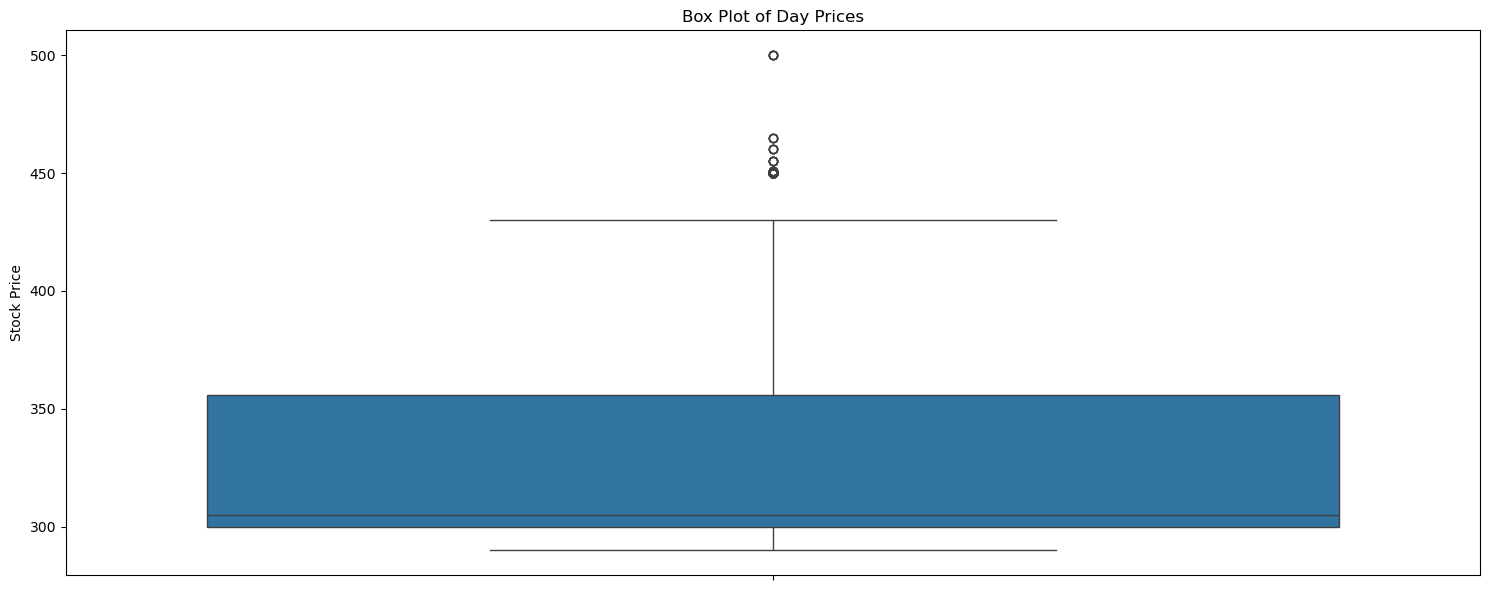

In [781]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day Price'])
plt.title('Box Plot of Day Prices')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

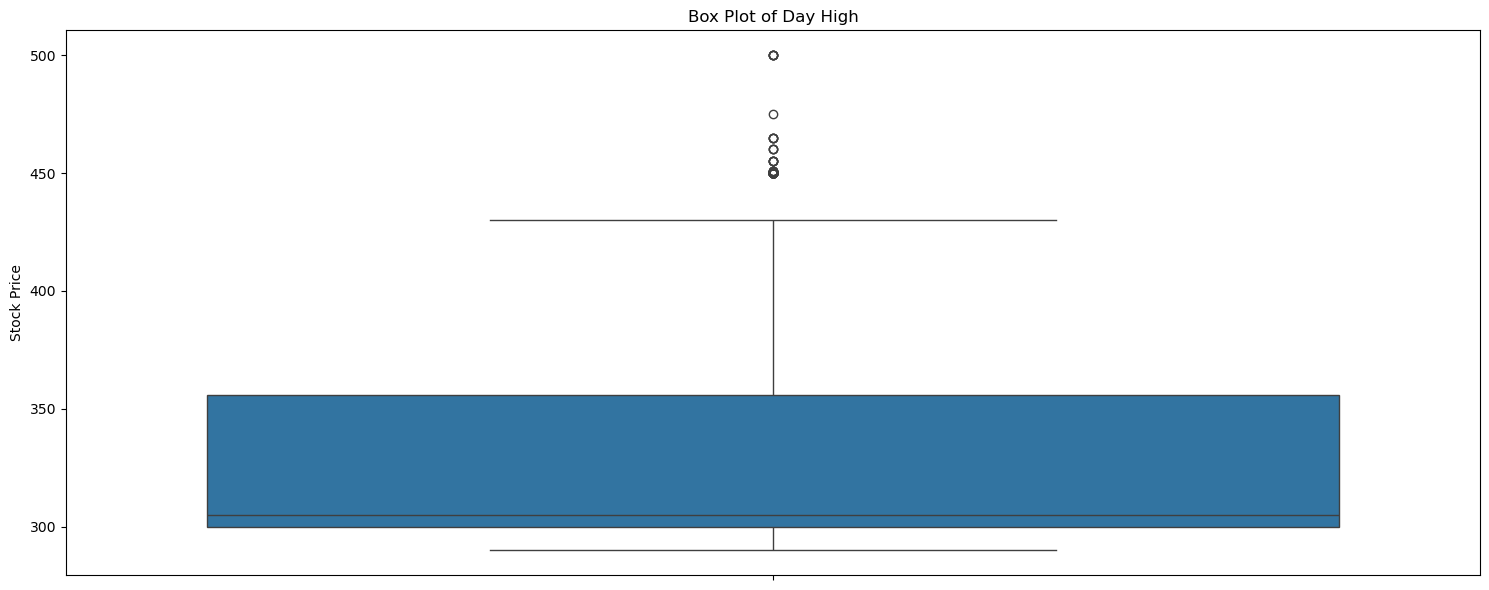

In [782]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day High'])
plt.title('Box Plot of Day High')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

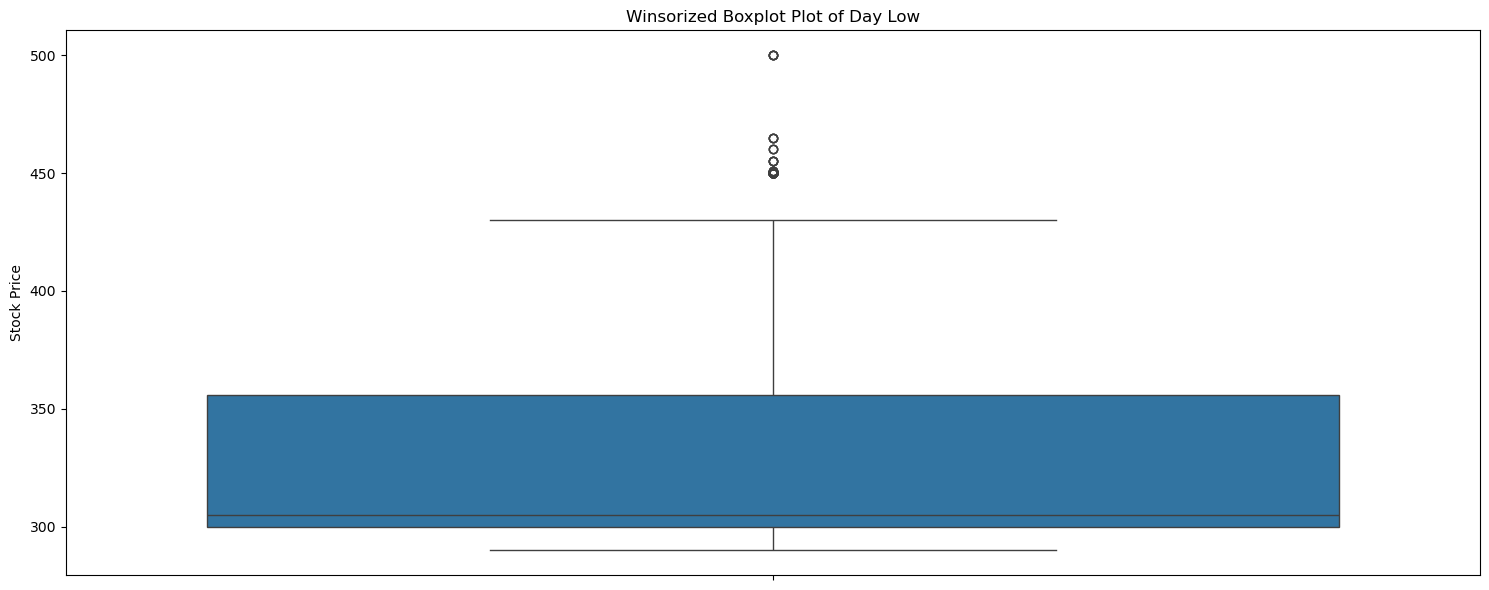

In [783]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day Low'])
plt.title('Winsorized Boxplot Plot of Day Low')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

### Handling Outliers.
---

In [784]:
from scipy.stats import mstats

In [800]:
def handle_outliers(data, columns, limits=(0.05, 0.05)):
    for col in columns:
        data[col] = mstats.winsorize(data[col], limits=limits)
    return data
numeric_columns = ['Day Price', 'Day High', 'Day Low', '12m High', '12m Low']

limuru_data = handle_outliers(limuru_data, numeric_columns, limits=(0.2, 0.2))

print("Outliers have been handled using winsorization.")

# Summary statistics after handling outliers
print("🔍 Summary Statistics After Handling Outliers:")
print(limuru_data[numeric_columns].describe())


Outliers have been handled using winsorization.
🔍 Summary Statistics After Handling Outliers:
          Day Price      Day High     Day Low  12m High  12m Low
count  9.950000e+02  9.950000e+02  995.000000     995.0    995.0
mean   5.712906e-17  1.142581e-16    0.000000       0.0      0.0
std    1.000503e+00  1.000503e+00    1.000503       0.0      0.0
min   -7.549080e-01 -7.557201e-01   -0.753738       0.0      0.0
25%   -7.549080e-01 -7.557201e-01   -0.753738       0.0      0.0
50%   -6.294431e-01 -6.303254e-01   -0.628149       0.0      0.0
75%    6.502993e-01  6.486999e-01    0.652863       0.0      0.0
max    1.754391e+00  1.752173e+00    1.758050       0.0      0.0


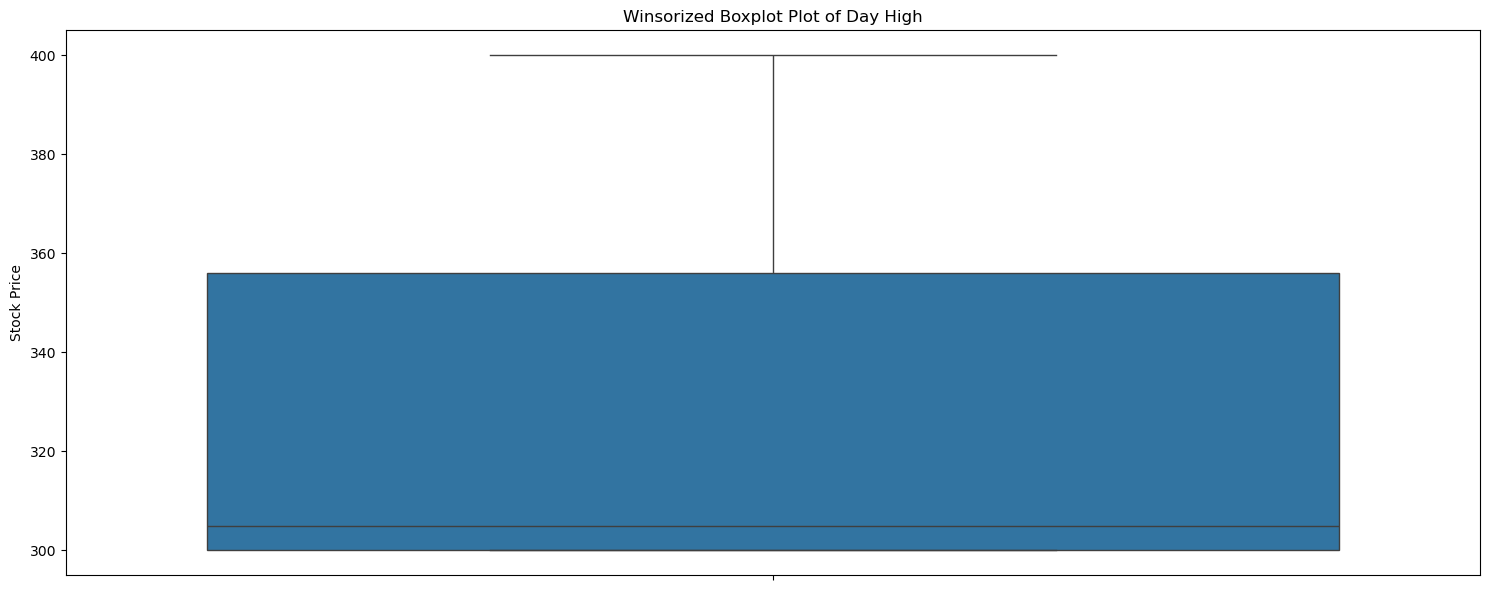

In [786]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day High'])
plt.title('Winsorized Boxplot Plot of Day High')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

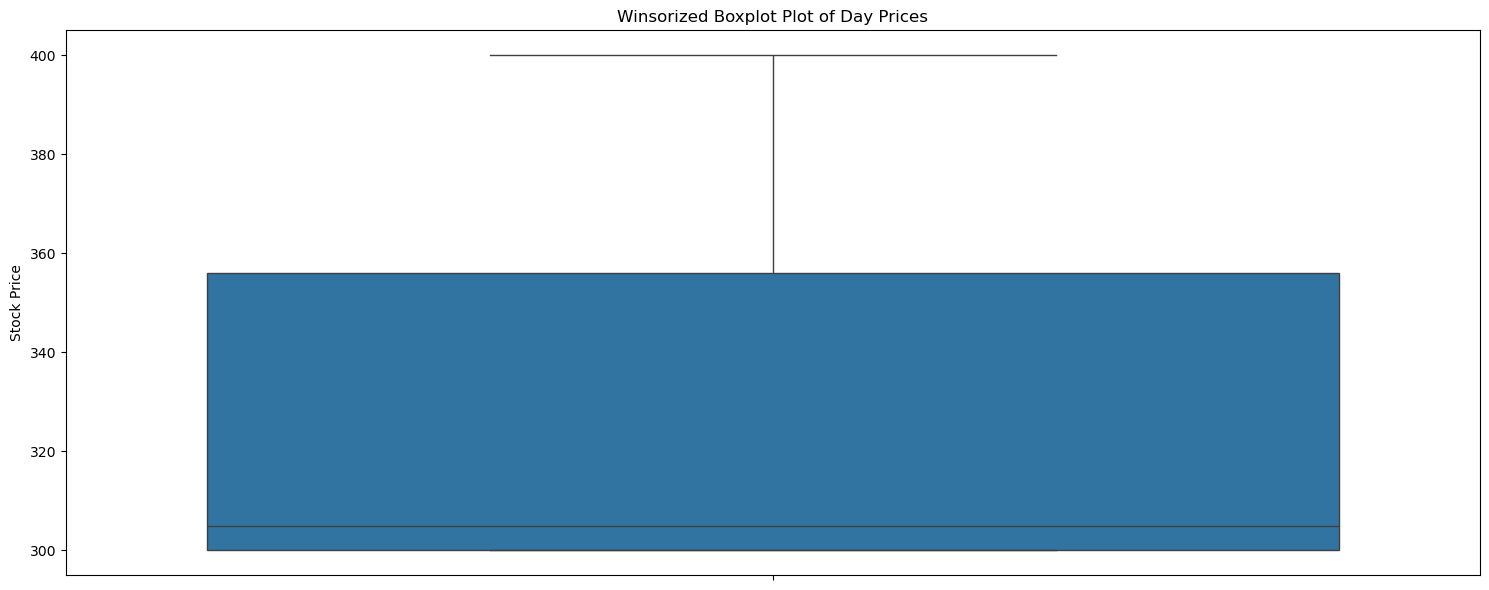

In [787]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day Price'])
plt.title('Winsorized Boxplot Plot of Day Prices')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

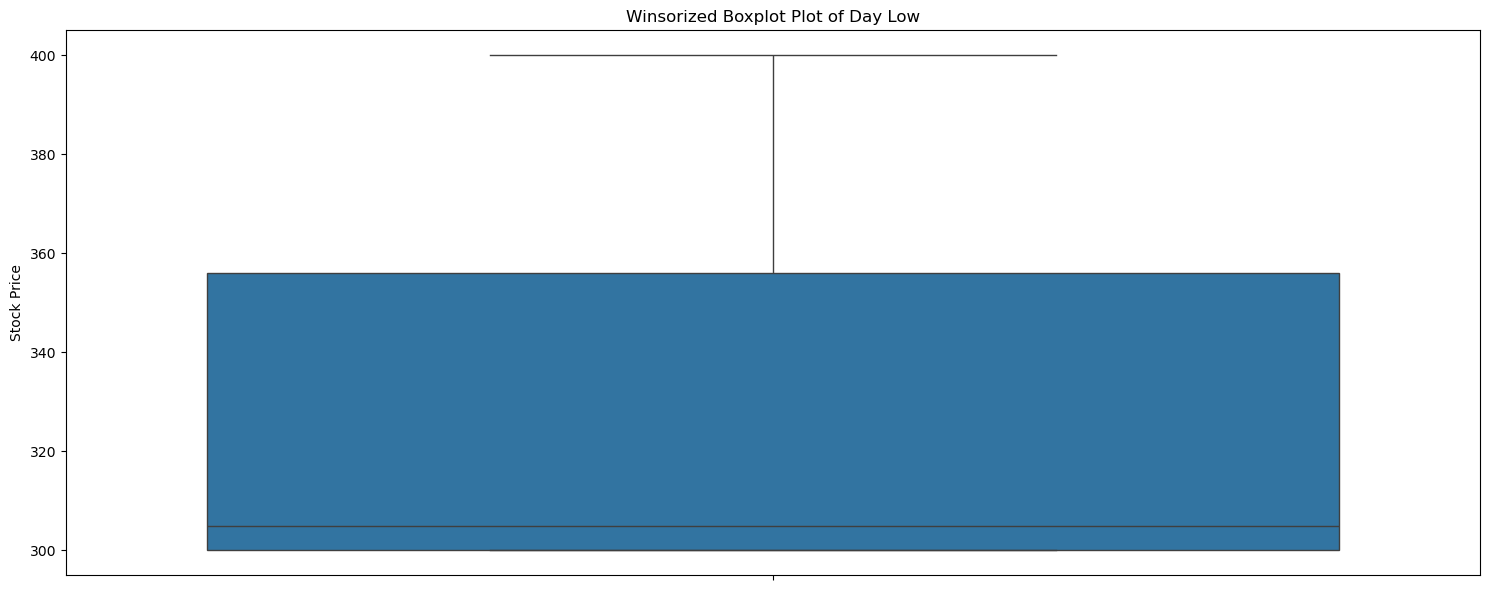

In [788]:
plt.figure(figsize=fig_size)
sns.boxplot(y=limuru_data['Day Low'])
plt.title('Winsorized Boxplot Plot of Day Low')
plt.ylabel('Stock Price')
plt.tight_layout()
plt.show()

###  Distribution of Stock Prices

---

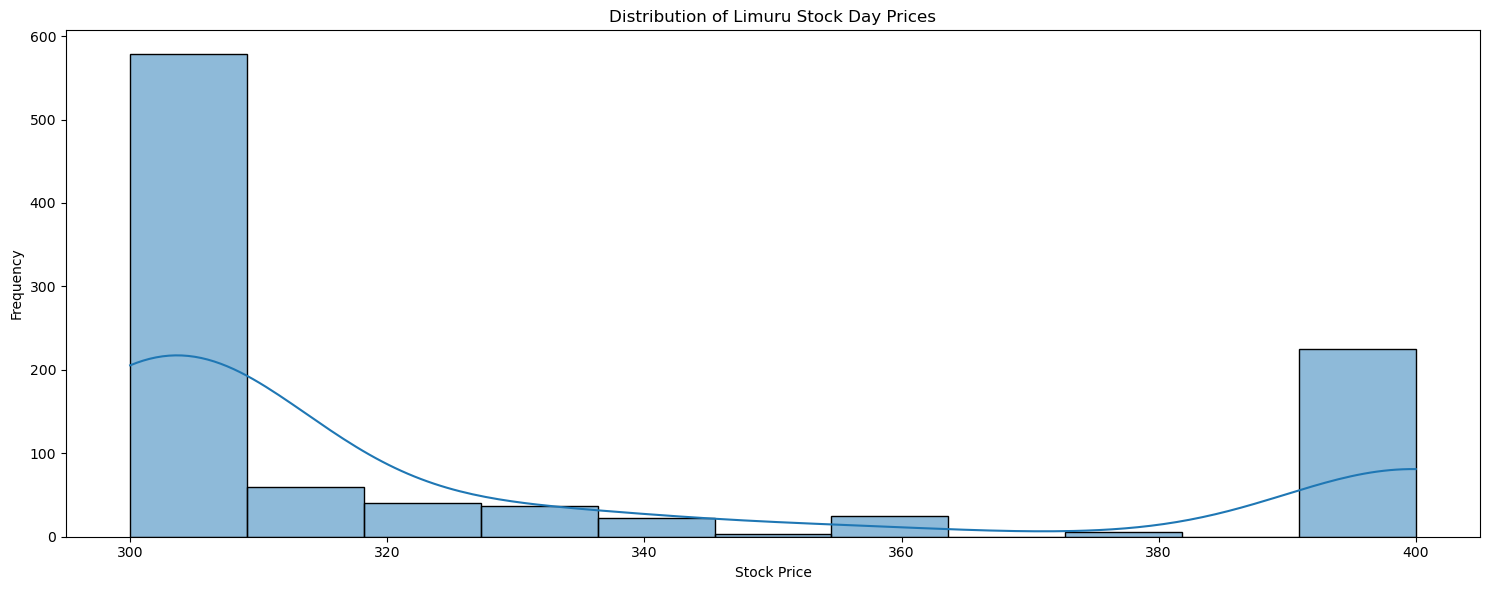

In [789]:
plt.figure(figsize=fig_size)
sns.histplot(data=limuru_data, x='Day Price', kde=True)
plt.title('Distribution of Limuru Stock Day Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

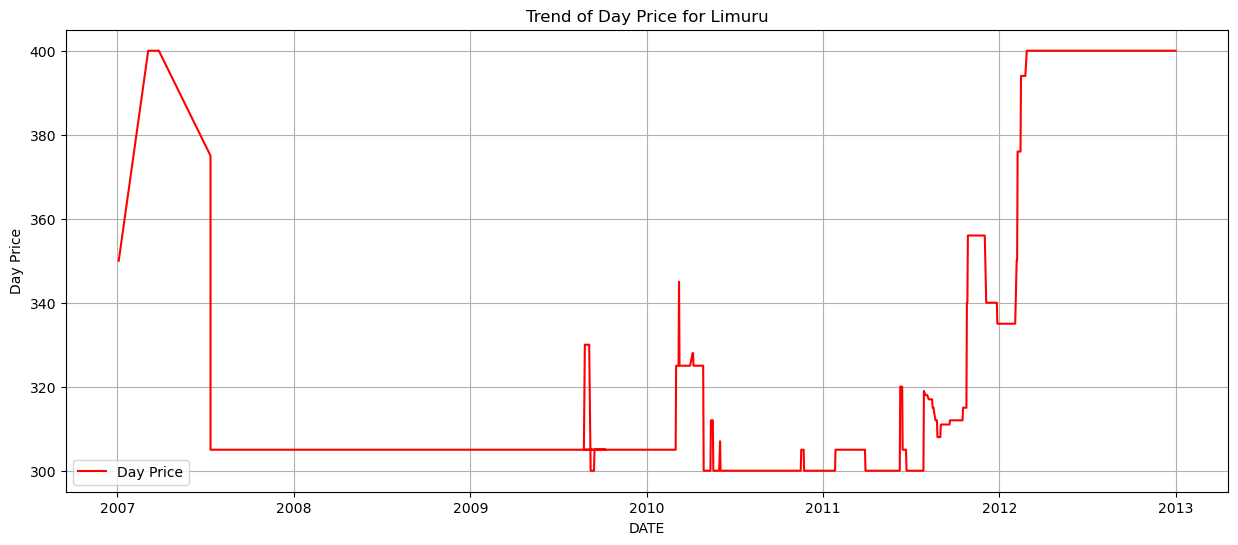

In [790]:
plt.figure(figsize=fig_size)
plt.plot(limuru_data['DATE'], limuru_data['Day Price'], label='Day Price', color='Red')
plt.title('Trend of Day Price for Limuru')
plt.xlabel('DATE')
plt.ylabel('Day Price')
plt.legend()
plt.grid()
plt.show()


### 🚀 **Training and Testing Data: The Journey Begins** 🧑‍🏫

Now that we have our dataset cleaned and preprocessed, it's time to move on to —**Training** and **Testing** our model! 🎯

---




In [791]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

#### Data Encoding.
---

In [792]:
label_encoder = LabelEncoder()
limuru_data['CODE'] = label_encoder.fit_transform(limuru_data['CODE'])
limuru_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 92 to 81500
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       995 non-null    datetime64[ns]
 1   CODE       995 non-null    int32         
 2   NAME       995 non-null    object        
 3   12m Low    995 non-null    int64         
 4   12m High   995 non-null    int64         
 5   Day Low    995 non-null    int64         
 6   Day High   995 non-null    int64         
 7   Day Price  995 non-null    int64         
 8   Previous   995 non-null    int64         
 9   Volume     995 non-null    int64         
 10  Year       995 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int32(1), int64(7), object(1)
memory usage: 89.4+ KB


#### Data Feature Scaling Process ⚖️  
---  

In [802]:
numeric_columns = limuru_data.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
limuru_data[numeric_columns] = scaler.fit_transform(limuru_data[numeric_columns])

# Verify the scaled features
limuru_data[numeric_columns].head(15)

,12m Low,12m High,Day Low,Day High,Day Price,Previous,Volume,Year
92,0.0,0.0,0.502156,0.498226,0.499741,0.223543,0.0,-2.992797
1972,0.0,0.0,1.758050,1.752173,1.754391,0.223543,0.0,-2.992797
2263,0.0,0.0,1.758050,1.752173,1.754391,1.133407,0.0,-2.992797
2305,0.0,0.0,1.758050,1.752173,1.754391,1.133407,0.0,-2.992797
2428,0.0,0.0,1.758050,1.752173,1.754391,1.133407,0.0,-2.992797
2632,0.0,0.0,1.758050,1.752173,1.754391,1.133407,0.0,-2.992797
5699,0.0,0.0,1.130103,1.125199,1.127066,1.133407,0.0,-2.992797
12601,0.0,0.0,0.200741,0.197279,0.198625,0.678475,0.0,-2.992797
16457,0.0,0.0,0.200741,0.197279,0.198625,0.005176,0.0,-2.992797
18946,0.0,0.0,0.200741,0.197279,0.198625,0.005176,0.0,-2.992797


#### Train-Test Split Process ✂️  
---  

In [807]:
data_size = limuru_data['Day Price'].size
print(f"The total number of rows in 'Day Price' is: {data_size}")


The total number of rows in 'Day Price' is: 995


In [804]:
X = limuru_data.drop(columns=['Day Price', 'DATE']) 
y = limuru_data['Day Price'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [805]:
print(f"Training data (X_train) shape: {X_train.shape}")
print(f"Testing data (X_test) shape: {X_test.shape}")


Training data (X_train) shape: (796, 9)
Testing data (X_test) shape: (199, 9)


#### Building the Neural Network 🧠  
---  